# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [2]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    print(image.shape)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [7]:
from utils import get_train_input

ImportError: cannot import name 'binary_focal_crossentropy' from 'keras.backend' (/home/bohm/miniconda3/envs/nd-self-driving-car/lib/python3.8/site-packages/keras/backend.py)

In [10]:
train_dataset = get_train_input("experiments/with_augs_ssd_resnet152/pipeline.config")

INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord', 'data/train/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord', 'data/train/segment-10082223140073588526_6140_000_6160_000_with_camera_labels.tfrecord', 'data/train/segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord', 'data/train/segment-11318901554551149504_520_000_540_000_with_camera_labels.tfrecord', 'data/train/segment-10212406498497081993_5300_000_5320_000_with_camera_labels.tfrecord', 'data/train/segment-12179768245749640056_5561_070_5581_070_with_camera_labels.tfrecord', 'data/train/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord', 'data/train/segment-11839652018869852123_2565_000_2585_000_with_camera_labels.tfrecord', 'data/train/segment-10327752107000040525_1120_000_1140_000_with_camera_labels.tfrecord', 'data/train/segment-10517728057304349900_3360_000_3380_000_with_came

(640, 640, 3)


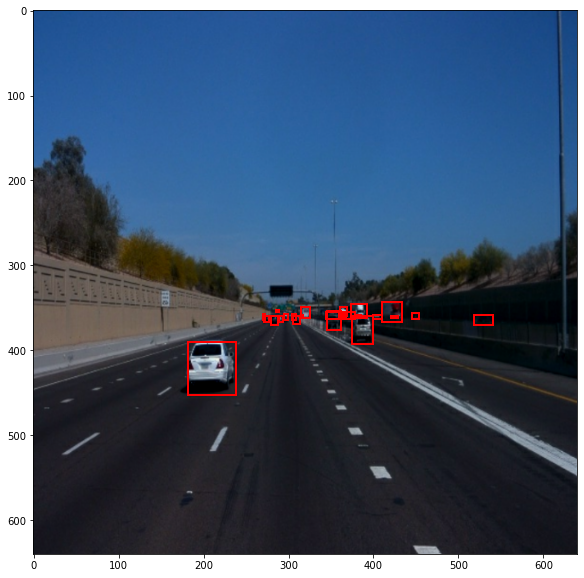

(640, 640, 3)


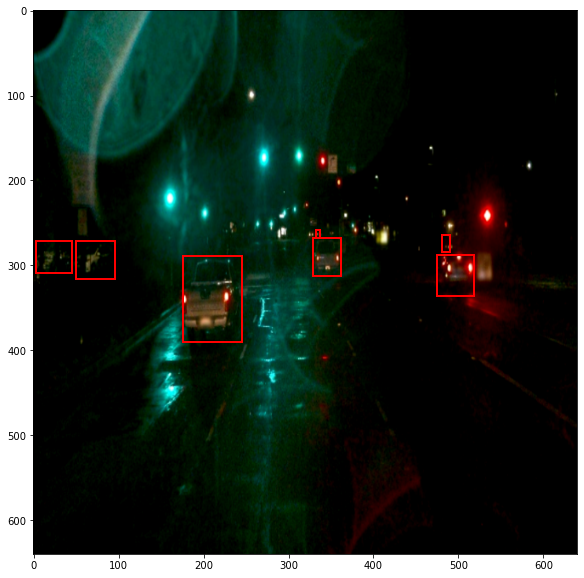

In [11]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)

In [9]:
import albumentations as A
from PIL import Image

In [13]:
pillow_image = Image.open('images/aug_image.png').convert('RGB')
image = np.array(pillow_image)

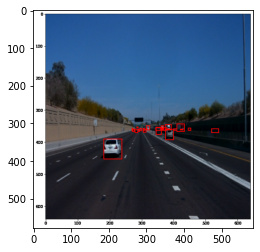

In [14]:
plt.imshow(image)
plt.show()

In [15]:
hue_adjust = A.HueSaturationValue(always_apply=True)
hue_adjusted = hue_adjust(image=image)

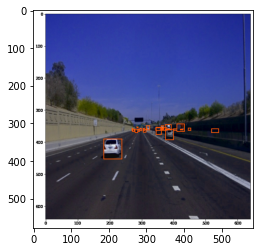

In [16]:
plt.imshow(hue_adjusted['image'])
plt.show()

In [18]:
contrast_adjust = A.RandomBrightnessContrast(always_apply=True)
contrast_adjusted = contrast_adjust(image=image)

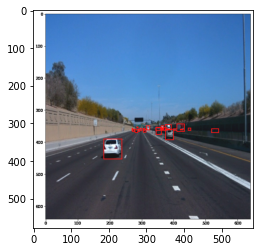

In [19]:
plt.imshow(contrast_adjusted['image'])
plt.show()

In [20]:
hflip_adjust = A.HorizontalFlip(always_apply=True)
hflip_adjusted = hflip_adjust(image=image)

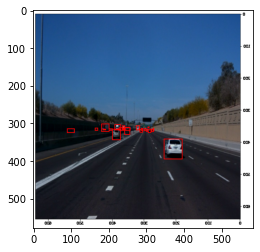

In [21]:
plt.imshow(hflip_adjusted['image'])
plt.show()